# BASIC GENE DRIVE SIMULATOR, PURE R CODE
## CMEE MSc 2020

#### DRIFT: WRIGHT-FISHER MODEL
#### SELECTION: 11 (HEG) HOMOZYGOTE ARE LETHAL
#### DRIVE: SUPER MENDELIAN INHERITANCE OF THE HEG ALLELE (FROM HETEROZYGOTES) WITH RATIO d




q0: RELEASING FREQ OF HEG

N0: INITIAL POPULATION SIZE

d: PROBABILITY OF INHERITING THE TRANSGENE (d>0.5)

t: NUMBER OF GENERATIONS 

THE TWO PARAMETERS FOR BEVERTON-HOLT POPULATION MODEL
    R0: THE INTRINISC RATE OF POPUALTION INCREASE
    M: THE NUMBER OF INDIVIDUALS AT WHICH DENSITY DEPENDENCE SURIVIVAL PROB = 0.5

In [8]:
gene_drive<-function(q0=0.05, d=0.6, t=10, N0=500, R0=2, M=500)
{
# SOME CHECKS ON THE INPUT PARAMETERS (OPTIONAL)
if (q0<=0 || q0>0.5)
    {stop('PLEASE MAKE SURE THAT 0<q0<0.5!')}
if (d<=0.5 || d>=1)
    {stop('PLEASE MAKE SURE THAT 0.5<d<1!')}

# SOME INNER FUNCTIONS. THESE INNER FUNCTIONS ARE ONLY VISIBLE WITHIN sim_gene_drive()
# 1) THE BEVERTON-HOLT MODEL. ceiling() TO ROUND UP. RETURN NEW POPULATION SIZE. 
bh<-function(N, R0, M)
    {return(ceiling(R0*N/(1+N/M)))}
# 2) RETURN THE COUNTS FOR 00, 01, 11 GENOTYPES
count_genotype<-function(x)
    {
    temp<-apply(x, 2, sum)
    return(c(sum(temp==0), sum(temp==1), sum(temp==2)))
    }
    

# INITIALISE
# CREATE SOME EMPTY LIST AND VECTORS TO STORE THE REQUIRED INFORMATION
population<-list()
length(population)<-(t+1)
# OPTIONAL STEP, TO GIVE NAMES TO EVERY ELEMENTS OF population
for (i in 1:length(population))
    {names(population)[i]<-paste(c('generation', i-1), collapse='')}
# INITIATE STOAGE
population.size<-rep(NA, t+1)
allele.freq.q<-rep(NA, t+1)

# FILL IN THE INITIAL VALUES
population.size[1]<-N0
allele.freq.q[1]<-q0

# WE WILL RELEASE k TRANSGENIC MOSQUITOES, AND THEY ARE ALL 01 HETEROZYGOTE
k<-ceiling(2*N0*q0)
population[[1]]<-matrix(c(rep(c(0,0), N0-k), rep(c(0,1), k)), nr=2)
# ALSO RECORD THE COUNTS FOR GENOTYPES 00, 01, 11
genotype<-count_genotype(population[[1]])

# PROPAGATION
for (i in 1:t)
{
# CALCULATE THE NEW POPULATION SIZE, 
    #ONLY genotype[1]+genotype[2] SURVIVE TILL ADULTHOOD
        ## THESE are the mating population - produce N*R * M(M+N) offspring. 
    population.size[i+1]<-bh(genotype[1]+genotype[2], R0, M)
    
    #ALTERNATIVELY 11 survive but are unable to reproduce
    ## They take 
    
    # EARLY EXIT CONDITION, IF THE POPULATION SIZE DROP TO 1
    if (population.size[i+1]<=1)
    {
        print(paste(c('Oops! The population crashed after generation ', i-1), collapse=''))
        return(list(population=population[1:i], population.size=population.size[1:i], allele.freq.q=allele.freq.q[1:i]))
    }
    # EARLY EXIT CONDITION, IF THERE IS NO HEG IN THE POPULATION
    if (genotype[2]+genotype[3]==0)
    {
        print(paste(c('Oops! HEG went extinct at generation ', i-1), collapse=''))
        return(list(population=population[1:i], population.size=population.size[1:i], allele.freq.q=allele.freq.q[1:i]))
    }
    
    # THE GAMETE FREQ OF HEG - THE FREQUENCY OF TRANSGENE IN THE GAMETES
    gamete.freq.q<-genotype[2]*d/(genotype[1]+genotype[2])

    # FILL IN THE NEW POPULATION AND UPDATE THE GENOTYPE COUNTS
    population[[i+1]]<-matrix(sample(0:1, size=2*population.size[i+1], prob=c(1-gamete.freq.q, gamete.freq.q), replace=T), nr=2)
    genotype<-count_genotype(population[[i+1]])
    # CENSUS BEFORE SELECTION OCCURS
    allele.freq.q[i+1]<-(0.5*genotype[2]+genotype[3])/population.size[i+1]
}

# OUTPUT
return(list(population=population, population.size=population.size, allele.freq.q=allele.freq.q))
}

In [10]:
# TEST RUN
gene_drive(q0=0.05, d=0.6, t=10)

0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,1,0,0,0,0,0


# Problem 1

N = 500

M = 500

R0 = 2

d = 0.6

q0 = 0.05

What is the expected TG frequency after t = 50 generations?

Can you detect any population decline?


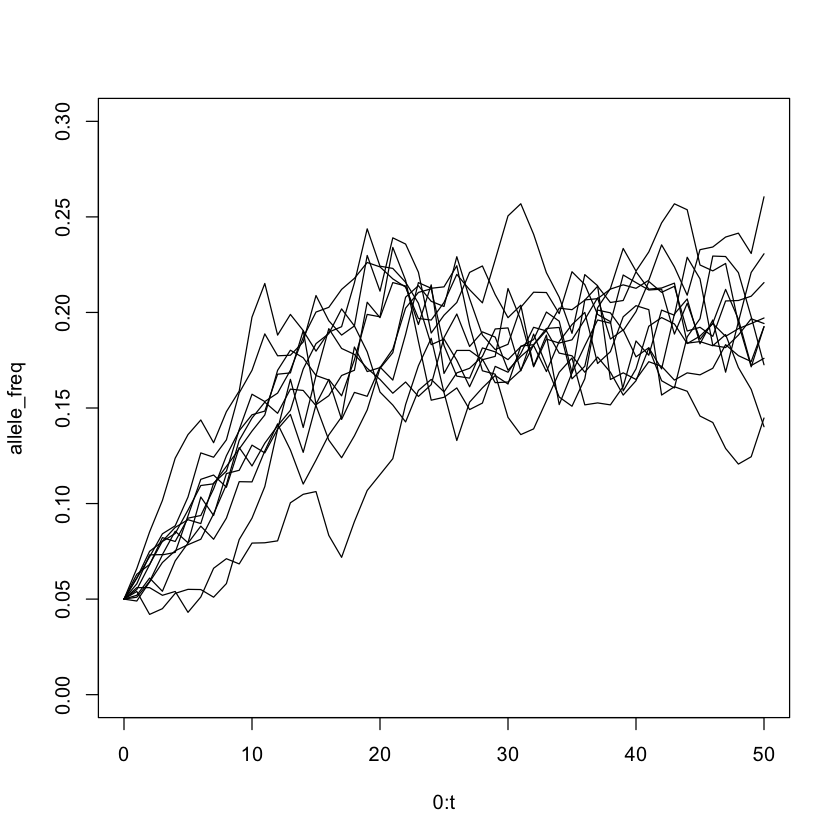

In [11]:
#Plotting the frequency of the HEG through time
t=50
temp1 = gene_drive(q0=0.05, d=0.6, t, N0=500, R0=2, M=500)
plot(0:t, temp1$allele.freq.q, type='l', ylab='allele_freq',ylim=c(0,0.3))
for (i in 1:10){
    temp1 = gene_drive(q0=0.05, d=0.6, t)
    lines(0:t, temp1$allele.freq.q)
    }

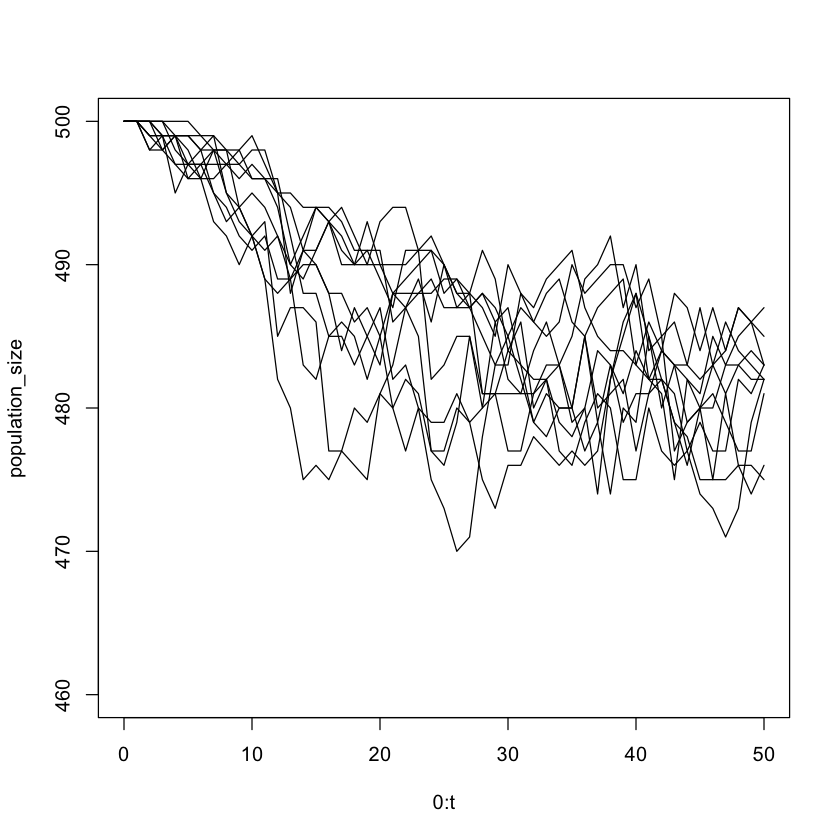

In [19]:
#Plotting the population size through time
t = 50
temp1 = gene_drive(q0=0.05, d=0.6, t, N0=500, R0=2, M=500)
plot(0:t, temp1$population.size, type='l', ylab='population_size', ylim=c(460,500))
for (i in 1:10){
    temp1 = gene_drive(q0=0.05, d=0.6, t)
    lines(0:t, temp1$population.size)
    }

[1] 0.197875

[1] 0.0007273906

2.5%     97.5% 
0.1455151 0.2521312

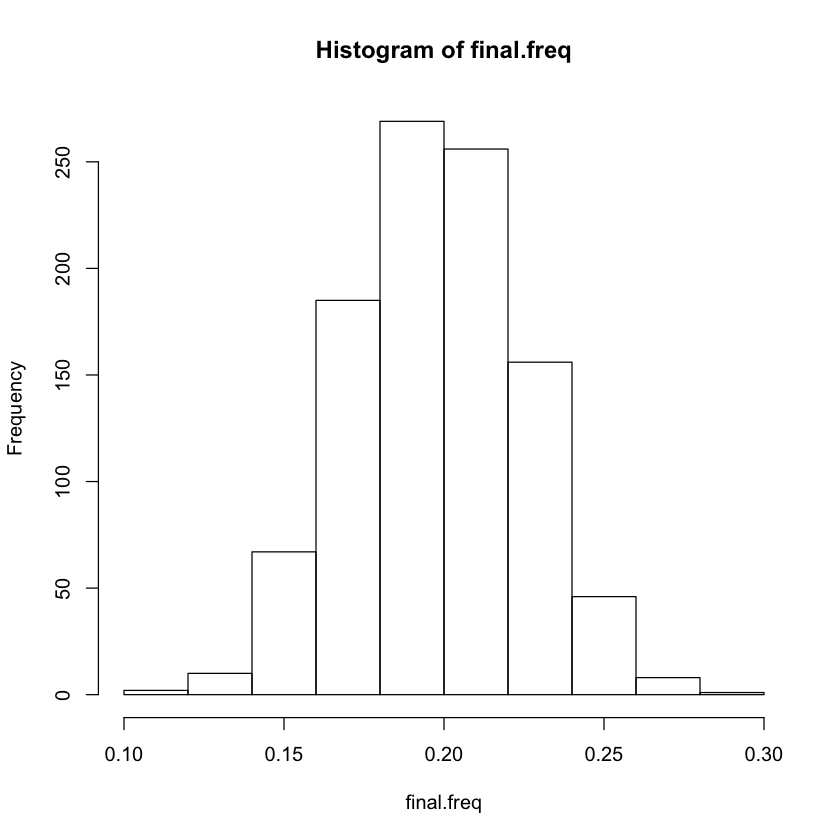

In [13]:
#storing the end points
final.freq<-rep(NA, 1000)
final.pop.size<-rep(NA, 1000)
for (i in 1:length(final.freq))
{
    temp<-gene_drive(q0=0.05, d=0.6, t=50, N0=500, R0=2, M=500)
    final.freq[i]<-temp$allele.freq.q[51]
    final.pop.size[i]<-temp$population.size[51]
}

# PROBLEM 1 EQUILIBRIUM HEG FREQ
hist(final.freq, main='', xlab='final TG freq after 50 generations')
mean(final.freq)
var(final.freq)
quantile(final.freq, c(0.025, 0.975))


[1] 480.424

[1] 28.62084

2.5% 97.5% 
  469   489

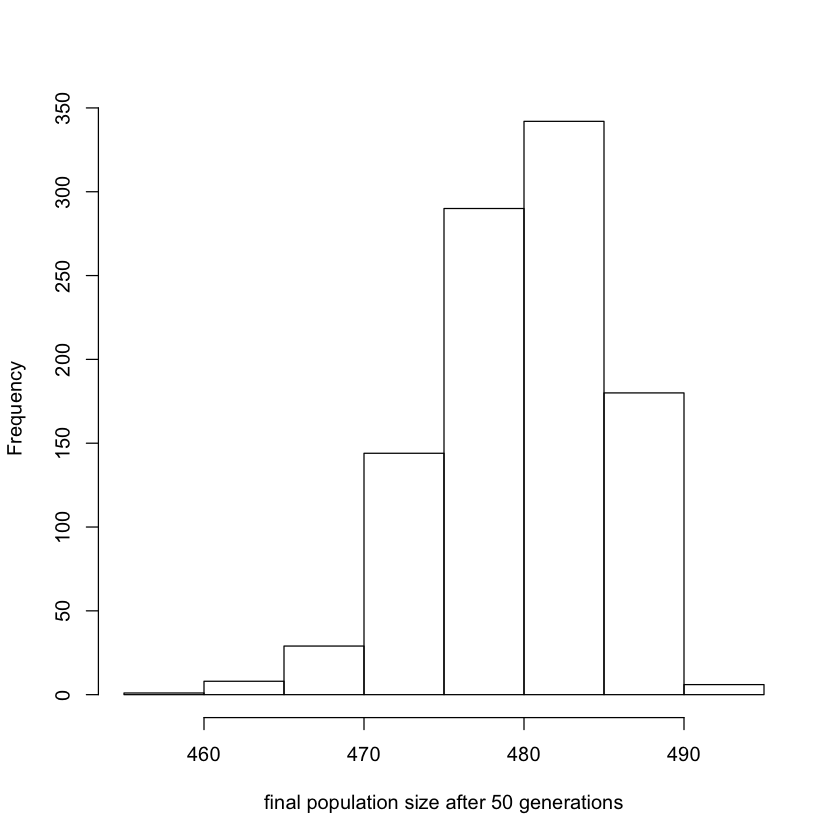

In [14]:
# PROBLEM 1 CAN YOU DETECT ANY POPULATION DECLINE?
hist(final.pop.size, main='', xlab='final population size after 50 generations')
mean(final.pop.size)
var(final.pop.size)
quantile(final.pop.size, c(0.025, 0.975))


In [ ]:
# MULTI-CORE foreach LOOP IMPLEMENTATION. 
# USE doParallel. makeCluster(n), n MUST NOT EXCEED THE NUMBER OF CPU CORES OF YOUR PC. 
cl<-makeCluster(6)
registerDoParallel(cl)
result<-foreach(i=1:5000, .combine='rbind') %dopar%
{
temp<-gene_drive(q0=0.05, d=0.6, t=50, N0=500, M=500, R0=2)
return(c(temp$allele.freq.q[51], temp$population.size[51]))
}
stopCluster(cl)
final.freq<-result[,1]
final.pop.size<-result[,2]

mean(final.freq)
sd(final.freq)
mean(final.pop.size)
sd(final.pop.size)
hist(final.freq, main='', xlab='final TG freq after 50 generations')
hist(final.pop.size, main='', xlab='final population size after 50 generations')


# Problem 2 - release strategy

N = 500

M = 500

R0 = 2

d = 0.6

If releasing frequency of the HEG is too low then it may not survivie or spread. We would like to find the minimum releasing frequency to ensure our TG can survive for at least t = 20 generations with 98% confidence. 

Hint: the survival probability can be approximated by the proportion of runs that have non-zero TG frequency at the end.

Repeat this for a range of q0. 

Example q0, 0.5% to 3%.



[1] "Oops! HEG went extinct at generation 6"
[1] "Oops! HEG went extinct at generation 4"
[1] "Oops! HEG went extinct at generation 10"


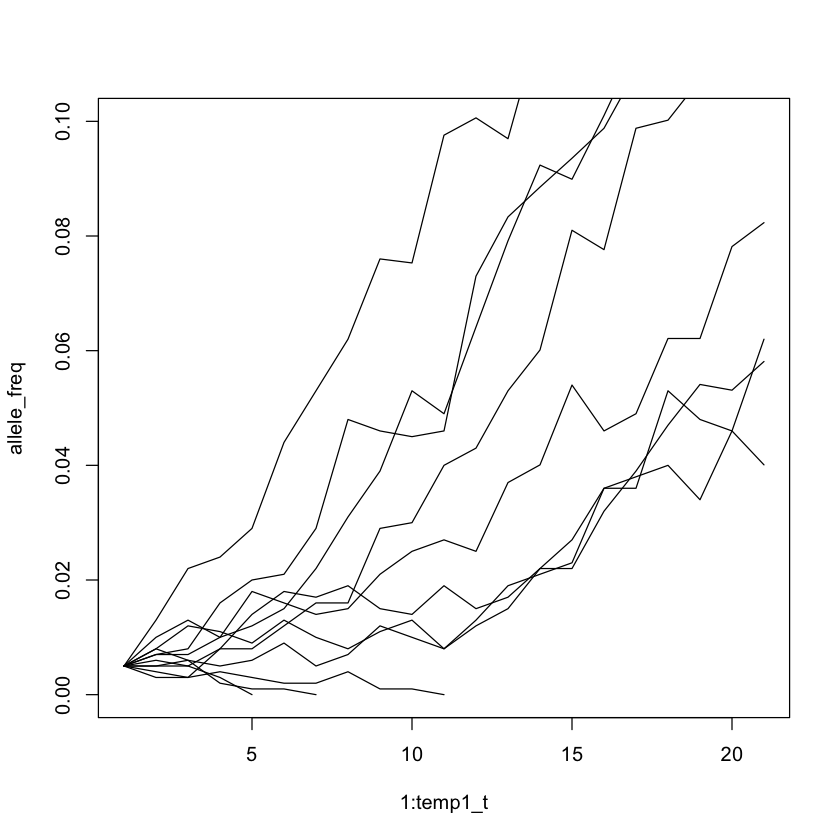

In [20]:
#Using q0 = 0.005 as an example

t = 20
q0 = 0.005

temp1<-gene_drive(q0, d=0.6, t, N0=500, R0=2, M=500)
temp1_t = length(temp1$allele.freq.q)
plot(1:temp1_t, temp1$allele.freq.q, type='l', ylab='allele_freq',ylim = c(0,0.1))

for (i in 1:10){
    temp1 = gene_drive(q0, d=0.6, t, R0=2, M=500)
    temp1_t = length(temp1$allele.freq.q)
    lines(1:temp1_t, temp1$allele.freq.q)
}

In [35]:
seq(0.005, 0.025, 0.005)

[1] 0.005 0.010 0.015 0.020 0.025

[1] "Oops! HEG went extinct at generation 17"
[1] "Oops! HEG went extinct at generation 3"
[1] "Oops! HEG went extinct at generation 3"
[1] "Oops! HEG went extinct at generation 5"
[1] "Oops! HEG went extinct at generation 5"
[1] "Oops! HEG went extinct at generation 13"
[1] "Oops! HEG went extinct at generation 8"
[1] "Oops! HEG went extinct at generation 4"
[1] "Oops! HEG went extinct at generation 7"
[1] "Oops! HEG went extinct at generation 4"
[1] "Oops! HEG went extinct at generation 6"
[1] "Oops! HEG went extinct at generation 16"
[1] "Oops! HEG went extinct at generation 9"
[1] "Oops! HEG went extinct at generation 6"
[1] "Oops! HEG went extinct at generation 4"
[1] "Oops! HEG went extinct at generation 5"
[1] "Oops! HEG went extinct at generation 18"
[1] "Oops! HEG went extinct at generation 2"
[1] "Oops! HEG went extinct at generation 5"
[1] "Oops! HEG went extinct at generation 19"
[1] "Oops! HEG went extinct at generation 10"
[1] "Oops! HEG went extinct at generation 4"
[1] 

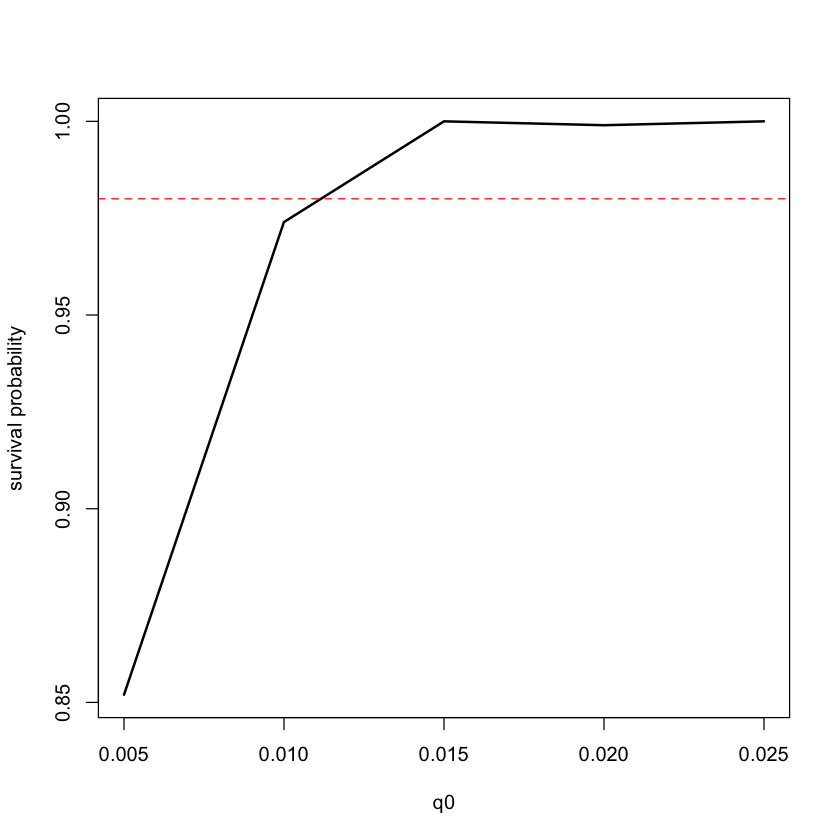

In [22]:

q0<-seq(0.005, 0.025, 0.005)
survival.prob<-rep(NA, length(q0))
#For different release frequencies
for (i in 1:length(q0))
{
    temp<-rep(NA, 1000)
    for (j in 1:1000)
    {
        temp1<-gene_drive(q0=q0[i], d=0.6, t=20, N0=500, R0=2, M=500)
        #The frequency of the HEG at the end of the simulation
        temp[j]<-temp1$allele.freq.q[length(temp1$allele.freq.q)]
    }
    #Those with allele frequencies of more than zero survived
    survival.prob[i]<-sum(temp>0)/1000
}
plot(q0, survival.prob, type='l', lwd=2, ylab='survival probability')
abline(h=0.98, col='red', lty=2)

#What is the minimum release frequency required to ensyre the TG survives 20 generations with 98% considence?

# Problem 3 - construct design

N = 500

M = 500

R0 = 2

Use a reasonable release frequency (based on the previous analysis)

Our laboratory team is working on a new (and potentially stronger) TG. 
What is the minimum transmission rate (d) required if we aim to reduce the mosquito population size by 40% in t = 30 generations?

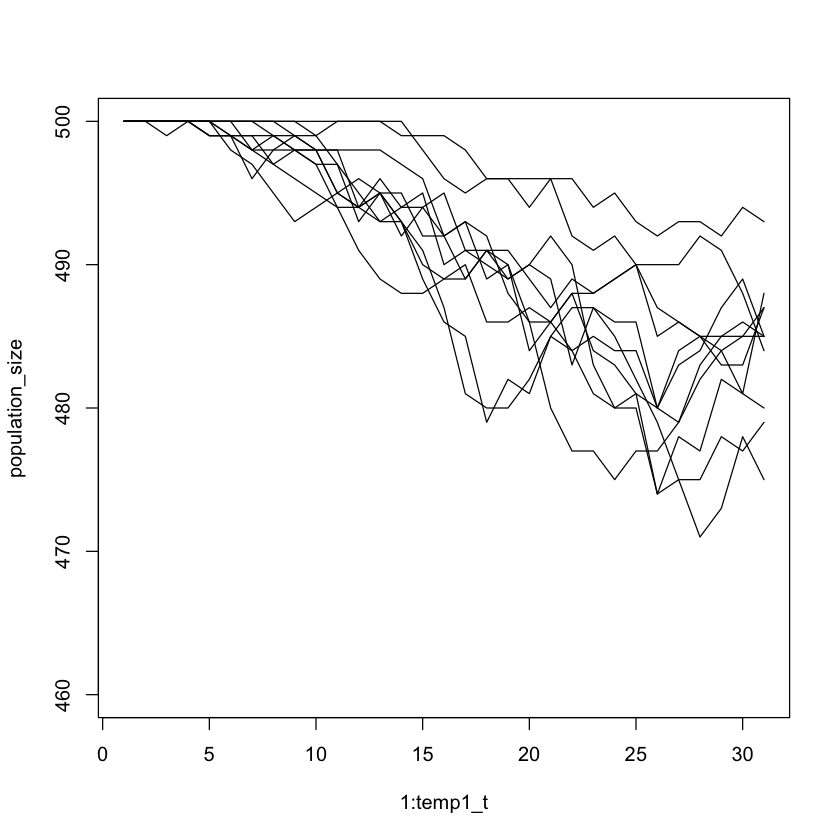

In [23]:
#Example for a single d
t = 30
q0 = 0.025
d = 0.6

temp1<-gene_drive(q0, d, t, N0=500, R0=2, M=500)
temp1_t = length(temp1$population.size)
plot(1:temp1_t, temp1$population.size, type='l', ylab='population_size',ylim=c(460,500))

for (i in 1:10){
    temp1 = gene_drive(q0, d, t, R0=2, M=500)
    temp1_t = length(temp1$population.size)
    lines(1:temp1_t, temp1$population.size)
}

[1] "Oops! HEG went extinct at generation 11"
[1] "Oops! The population crashed after generation 27"
[1] "Oops! The population crashed after generation 25"
[1] "Oops! The population crashed after generation 29"
[1] "Oops! The population crashed after generation 21"
[1] "Oops! The population crashed after generation 25"
[1] "Oops! The population crashed after generation 26"
[1] "Oops! The population crashed after generation 24"
[1] "Oops! The population crashed after generation 25"
[1] "Oops! The population crashed after generation 27"
[1] "Oops! The population crashed after generation 29"
[1] "Oops! The population crashed after generation 25"
[1] "Oops! The population crashed after generation 28"
[1] "Oops! The population crashed after generation 26"
[1] "Oops! The population crashed after generation 29"
[1] "Oops! The population crashed after generation 26"
[1] "Oops! The population crashed after generation 29"
[1] "Oops! The population crashed after generation 28"
[1] "Oops! The popu

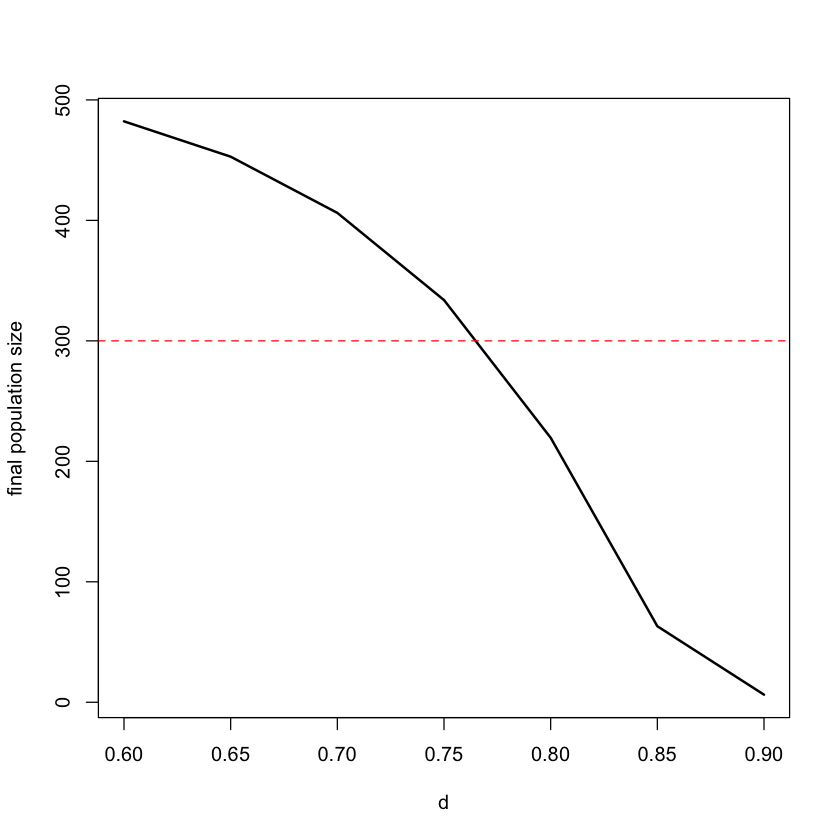

In [29]:
# PROBLEM 3 CONSTRUCT DESIGN
d<-seq(0.6, 0.9, 0.05)
final.mean.pop.size<-rep(NA, length(d))
for (i in 1:length(final.mean.pop.size))
{
    temp<-rep(NA, 1000)
    for (j in 1:1000)
    {
        temp1<-gene_drive(q0=0.03, d=d[i], t=30, N0=500, R0=2, M=500)
        temp[j]<-temp1$population.size[length(temp1$population.size)]
    }
    final.mean.pop.size[i]<-mean(temp, na.rm=T)
}
plot(d, final.mean.pop.size, type='l', ylab='final population size', lwd=2, cex=2)
abline(h=300, col='red', lty=2)

# Problem 4 - targeing different population profiles

A new TG with d = 0.75 is going to be released in two distrinct populations of the same size N0 = 500. 

Population A has R0 = 2 and M = 500

Population B has R0 = 6 and M = 100

Note that the two populations have the same carrying capacity (R0-1)M, but population B has a higher intrinsic growth rate.

Evaluate the performance of this TG on these two populations in rerms of population reduction. 

t = 30 generations. 

In [25]:
#Example simulations: save the population sizes through time for a series of simulations
pop_A<-matrix(nc=31, nr=1000)
pop_B<-matrix(nc=31, nr=1000)
for (i in 1:nrow(pop_A))
{
    pop_A[i,]<-gene_drive(q0=0.02, d=0.75, t=30, N0=500, R0=2, M=500)$population.size
    pop_B[i,]<-gene_drive(q0=0.02, d=0.75, t=30, N0=500, R0=6, M=100)$population.size
}


In [151]:
pop_A[1,1:t]

[1] 500 500 499 500 499 497 498 494 490 487 475 462 453 429 416 400 385 380 362
[20] 343 343 343 330 320 301 305 302 305 310 320

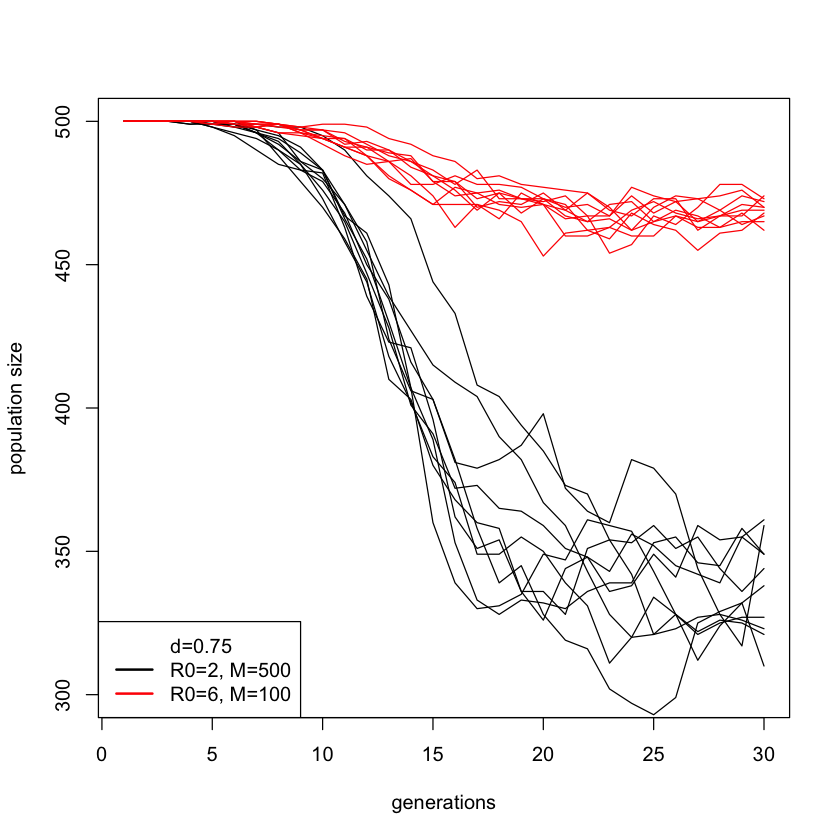

In [28]:
plot(1:t, pop_A[1,1:t], type='l', xlab='generations', ylab='population size', 
    ylim=c(300, 500))
for (i in 2:10){
    lines(1:t, pop_A[i,1:t], type='l', xlab='generations', ylab='population size', 
        ylim=c(300, 500))
}
lines(1:t, pop_B[1,1:t], col='red', type='l', xlab='generations', ylab='population size', 
    ylim=c(300, 500))
for (i in 2:10){
    lines(1:t, pop_B[i,1:t], col='red', type='l', xlab='generations', ylab='population size', 
        ylim=c(300, 500))
}
legend('bottomleft', c('d=0.75', 'R0=2, M=500', 'R0=6, M=100'), col=c(NA, 1, 2), lty=c(NA, 1, 1), lwd=2)

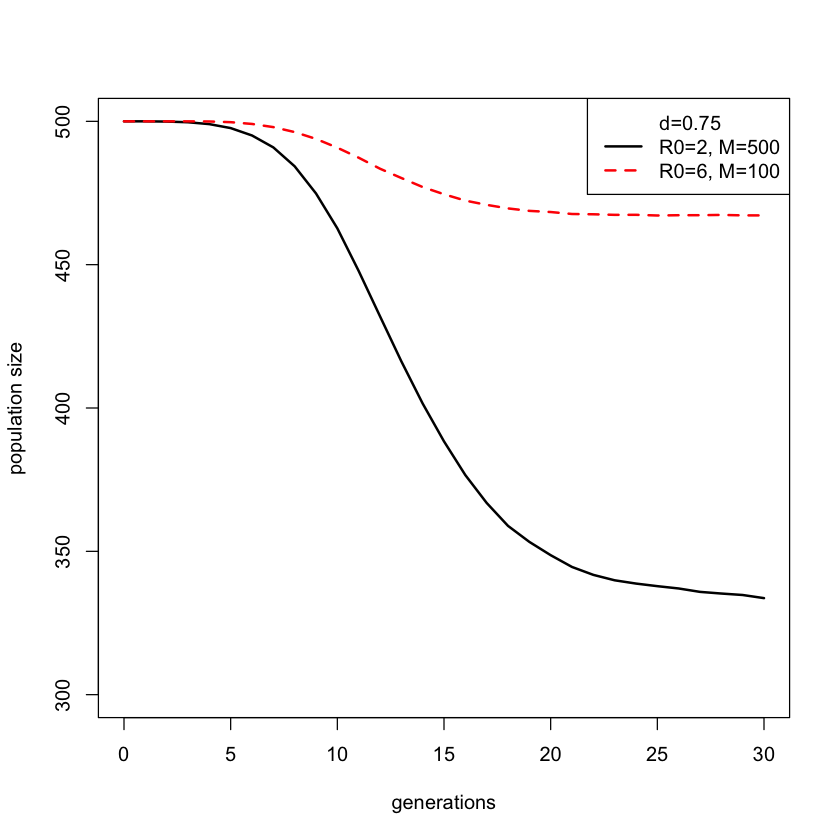

In [128]:
pop_A_mean<-apply(pop_A, 2, mean, na.rm=T)
pop_B_mean<-apply(pop_B, 2, mean, na.rm=T)
plot(0:30, pop_A_mean, type='l', xlab='generations', ylab='population size', 
    ylim=c(300, 500), lwd=2)
lines(0:30, pop_B_mean, col='red', lwd=2, lty=2)
legend('topright', c('d=0.75', 'R0=2, M=500', 'R0=6, M=100'), col=c(NA, 1, 2), lty=c(NA, 1, 2), lwd=2)

# Problem 5 - equilibrium frequency

N = 500

M = 500

R0 = 2

Show that, given a value of d (transmission rate), the final equilirbium frequency in t = 30 generations does not depend on the initial frequency. 

Show that the equilibrium frequency is a function of only d

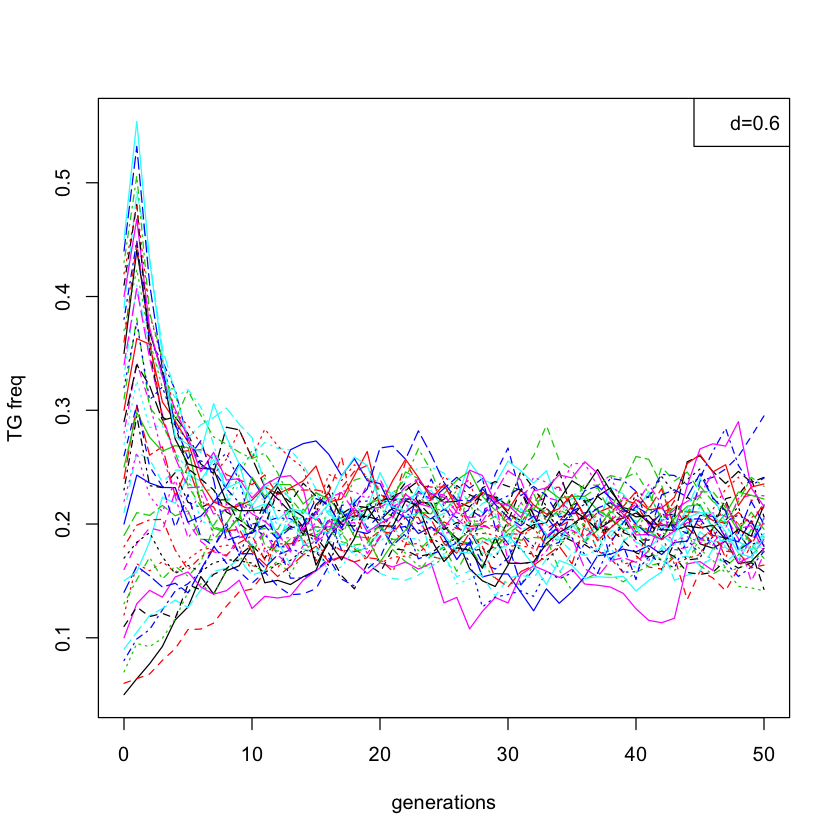

In [33]:
# PROBLEM 5
initial_freq<-seq(0.05, 0.45, 0.01)
result<-matrix(nc=51, nr=length(initial_freq))
for (i in 1:length(initial_freq))
{
    temp<-gene_drive(q0=initial_freq[i], d=0.6, t=50, N0=500, R0=2, M=500)
    result[i,]<-temp$allele.freq.q
}

matplot(0:50, t(result), type='l', xlab='generations', ylab='TG freq')
legend('topright', legend='d=0.6')

In [34]:
#The equilibrium frequency of the TG is 2d-1
d=0.6
2*d-1

[1] 0.2

In [ ]:
#There is also an equlibrium population size. 